# Bank

# Import necessary libraries

In [59]:
import pandas as  pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve,roc_auc_score

import warnings
warnings.filterwarnings('ignore')

# Import Data

In [3]:
bank_data = pd.read_csv('bank-full.csv',sep=';', quotechar='"')
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# Data Understanding

In [4]:
bank_data.shape

(45211, 17)

In [5]:
bank_data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
bank_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

# Data Preperation

In [7]:
le = LabelEncoder()

In [9]:
bank_data['job']       = le.fit_transform(bank_data['job'])
bank_data['marital']   = le.fit_transform(bank_data['marital'])
bank_data['education'] = le.fit_transform(bank_data['education'])
bank_data['default']   = le.fit_transform(bank_data['default'])
bank_data['housing']   = le.fit_transform(bank_data['housing'])
bank_data['loan']      = le.fit_transform(bank_data['loan'])
bank_data['contact']   = le.fit_transform(bank_data['contact'])
bank_data['month']     = le.fit_transform(bank_data['month'])
bank_data['poutcome']  = le.fit_transform(bank_data['poutcome'])
bank_data['y']         = le.fit_transform(bank_data['y'])

In [10]:
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [11]:
bank_data.dtypes

age          int64
job          int32
marital      int32
education    int32
default      int32
balance      int64
housing      int32
loan         int32
contact      int32
day          int64
month        int32
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int32
y            int32
dtype: object

# Model Building

In [12]:
X = bank_data.drop('y',axis=1)
y = bank_data[['y']]

In [13]:
X.shape,y.shape

((45211, 16), (45211, 1))

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=12,shuffle=True,stratify=y)

In [16]:
X_train.shape,y_train.shape

((36168, 16), (36168, 1))

In [17]:
X_test.shape,y_test.shape

((9043, 16), (9043, 1))

In [53]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)

LogisticRegression()

# Model Testing | Model Evaluation

### Training data

In [54]:
y_pred_train =logistic_model.predict(X_train)

In [55]:
accuracy_score(y_train,y_pred_train)

0.8874972351249724

In [56]:
confusion_matrix(y_train,y_pred_train)

array([[31360,   577],
       [ 3492,   739]], dtype=int64)

In [57]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     31937
           1       0.56      0.17      0.27      4231

    accuracy                           0.89     36168
   macro avg       0.73      0.58      0.60     36168
weighted avg       0.86      0.89      0.86     36168



0.5782981905695379


Text(0, 0.5, 'True Positive Rate')

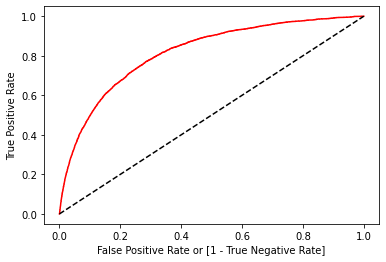

In [60]:
fpr, tpr, thresholds = roc_curve(y_train, logistic_model.predict_proba (X_train)[:,1])
auc = roc_auc_score(y_train,y_pred_train)
print(auc)
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

### Testing data

In [61]:
y_pred_test =logistic_model.predict(X_test)

In [62]:
accuracy_score(y_test,y_pred_test)

0.8874267389140772

In [63]:
confusion_matrix(y_test,y_pred_test)

array([[7846,  139],
       [ 879,  179]], dtype=int64)

In [64]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7985
           1       0.56      0.17      0.26      1058

    accuracy                           0.89      9043
   macro avg       0.73      0.58      0.60      9043
weighted avg       0.86      0.89      0.86      9043



0.5758897531169619


Text(0, 0.5, 'True Positive Rate')

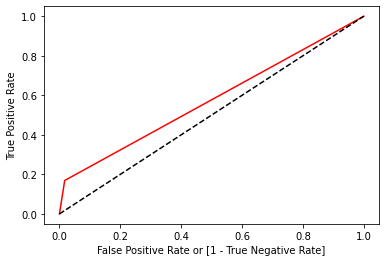

In [65]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
auc = roc_auc_score(y_test,y_pred_test)
print(auc)
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

# Model Deployment

In [66]:
from pickle import dump

In [67]:
dump(logistic_model,open('bank_intel.pkl','wb'))

In [68]:
from pickle import load

In [69]:
loaded_intell_file = load(open('bank_intel.pkl','rb'))

In [70]:
y_pred_new_sample = loaded_intell_file.predict(X_test)

In [71]:
accuracy_score(y_test,y_pred_new_sample)

0.8874267389140772

# ===================================================